In [1]:
import pandas as pd
s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)
from adtk.data import validate_series
s = validate_series(s)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_40838/460624034.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)


In [2]:

from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=50000, low=30000)
anomalies = threshold_ad.detect(s)

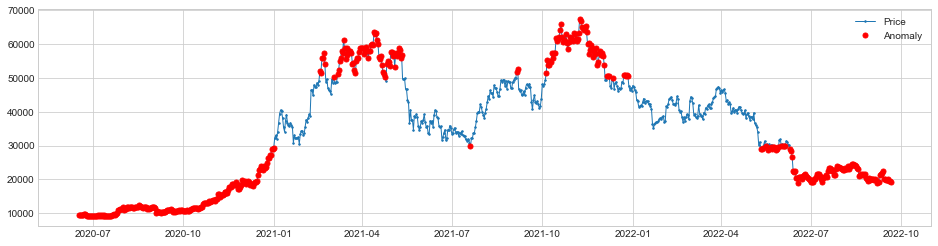

In [3]:
from adtk.visualization import plot
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

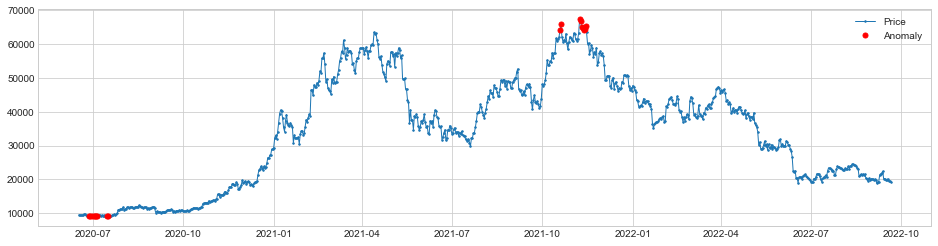

In [4]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.90, low=0.01)
anomalies = quantile_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");